In [1]:
import numpy as np
from scipy.integrate import odeint
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# Задані параметри
a = 0.5
b = 0.3
N = 1000000
S0 = 990000
I0 = 7000
R0 = 3000
t0 = 0
tf = 0.25

# Функція, яка описує систему диференціальних рівнянь SIR
def SIR_model(y, t):
    S, I, R = y
    dSdt = a * S
    dIdt = a * S - b * I
    dRdt = b * I
    return [dSdt, dIdt, dRdt]

# Вектор часу
time = np.linspace(t0, tf, num=100)

# Розв'язок системи диференціальних рівнянь
solution = odeint(SIR_model, [S0, I0, R0], time)

# Розділення розв'язку на окремі змінні
S = solution[:, 0]
I = solution[:, 1]
R = solution[:, 2]


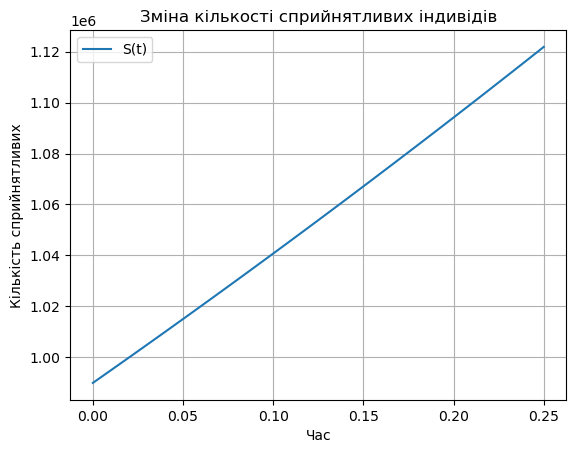

In [2]:
# Побудова графіку S(t)
plt.plot(time, S, label='S(t)')
plt.xlabel('Час')
plt.ylabel('Кількість сприйнятливих')
plt.title('Зміна кількості сприйнятливих індивідів')
plt.legend()
plt.grid(True)
plt.show()

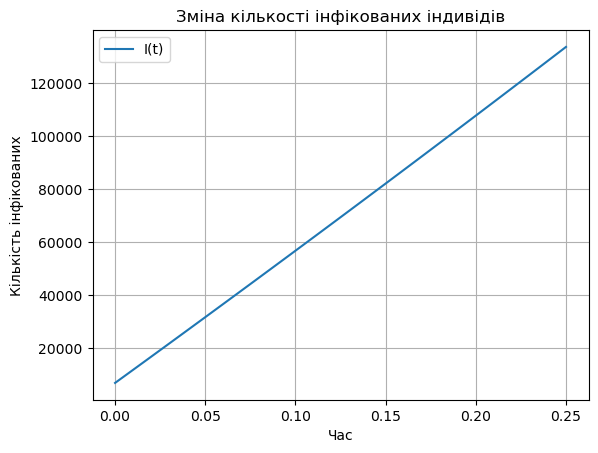

In [3]:
# Побудова графіку I(t)
plt.plot(time, I, label='I(t)')
plt.xlabel('Час')
plt.ylabel('Кількість інфікованих')
plt.title('Зміна кількості інфікованих індивідів')
plt.legend()
plt.grid(True)
plt.show()

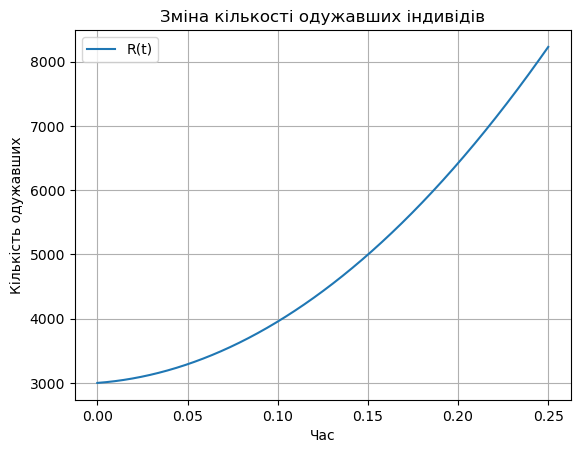

In [4]:
# Інтерполяція для побудови графіку R(t)
time_interp = np.linspace(t0, tf, num=10000)
R_interp = interp1d(time, R, kind='cubic')(time_interp)

# Побудова графіку R(t)
plt.plot(time_interp, R_interp, label='R(t)')
plt.xlabel('Час')
plt.ylabel('Кількість одужавших')
plt.title('Зміна кількості одужавших індивідів')
plt.legend()
plt.grid(True)
plt.show()

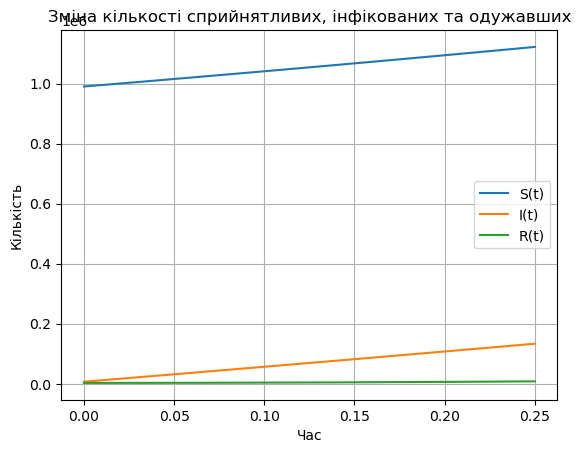

In [5]:
# Побудова графіків S(t), I(t) і R(t) на одній області відображення
plt.plot(time, S, label='S(t)')
plt.plot(time, I, label='I(t)')
plt.plot(time_interp, R_interp, label='R(t)')
plt.xlabel('Час')
plt.ylabel('Кількість')
plt.title('Зміна кількості сприйнятливих, інфікованих та одужавших')
plt.legend()
plt.grid(True)
plt.show()